In [2]:
import pandas as pd
data = pd.read_csv('data.csv', encoding="gbk")
data


,城市收入,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,?北??京,32903.03,36468.75,40321.00,48531.8,52859.2,57275.31079,62406.34222,67989.88886,73848.51337,69433.53964
1,?天??津,26920.86,29626.41,32293.60,31506.0,34101.3,37109.57286,40277.53931,42976.25264,46118.88892,43854.09361
2,?河??北,18292.23,20543.44,22580.30,24141.3,26152.2,28249.39182,30547.75811,32977.17583,35737.68343,27135.93668
3,?山??西,18123.87,20411.71,22455.60,24069.4,25827.7,27352.33097,29131.80796,31034.80226,33262.36558,25213.67066
4,?内蒙古,20407.57,23150.26,25496.70,28349.6,30594.1,32974.94643,35670.02049,38304.67874,40782.45901,31497.31528
...,...,...,...,...,...,...,...,...,...,...,...
64,?陕??西,13782.75,15332.84,16679.69,17546.0,18463.9,19368.90464,20388.22276,21966.43123,23514.28113,17417.61979
65,?甘??肃,11188.57,12847.05,14020.72,15942.3,17450.9,19539.22163,20659.44639,22605.97044,24453.86994,16174.94830
66,?青??海,10955.46,12346.29,13539.50,17492.9,19200.6,20853.16644,21472.98570,22997.52793,23799.17496,18284.22819
67,?宁??夏,12896.04,14067.15,15321.10,17216.2,18983.9,20364.23313,20219.49052,21976.69150,24160.96336,17505.82127


In [3]:
dataset = data.values[:31, 1:]
dataset.shape

(31, 10)

In [8]:
#定义距离函数
from math import sqrt, pow
def distEclud(vecA, vecB):
    return sqrt(sum((vecA-vecB)**2))


In [9]:
#设置质心
import numpy as np
def randCent(dataSet,k):
    m,n = dataSet.shape
    centroids = np.zeros((k,n))
    for i in range(k):
        index = int(np.random.uniform(0,m)) #
        centroids[i,:] = dataSet[index,:]
    return centroids

In [10]:
# k均值聚类
def KMeans(dataSet,k):
 
    m = np.shape(dataSet)[0]  #行的数目
    # 第一列存样本属于哪一簇
    # 第二列存样本的到簇的中心点的误差
    clusterAssment = np.mat(np.zeros((m,2)))
    clusterChange = True
 
    # 第1步 初始化centroids
    centroids = randCent(dataSet,k)
    while clusterChange:
        clusterChange = False
 
        # 遍历所有的样本（行数）
        for i in range(m):
            minDist = 1000000.0
            minIndex = -1
 
            # 遍历所有的质心
            #第2步 找出最近的质心
            for j in range(k):
                # 计算该样本到质心的欧式距离
                distance = distEclud(centroids[j,:],dataSet[i,:])
                if distance < minDist:
                    minDist = distance
                    minIndex = j
            # 第 3 步：更新每一行样本所属的簇
            if clusterAssment[i,0] != minIndex:
                clusterChange = True
                clusterAssment[i,:] = minIndex,minDist**2
        #第 4 步：更新质心
        for j in range(k):
            pointsInCluster = dataSet[np.nonzero(clusterAssment[:,0].A == j)[0]]  # 获取簇类所有的点
            centroids[j,:] = np.mean(pointsInCluster,axis=0)   # 对矩阵的行求均值
 
    print("Congratulations,cluster complete!")
    return centroids,clusterAssment



In [11]:
centroids,clusterAssment = KMeans(dataset, 3)

Congratulations,cluster complete!


In [17]:
lable = data.values[:31, 0]
F = []
S = []
T = []
for i in range(clusterAssment.shape[0]):
    if clusterAssment[i, 0] == 0:
        F = np.append(F, lable[i])
    elif clusterAssment[i, 0] == 1:
        S = np.append(S, lable[i])
    elif clusterAssment[i, 0] == 2:
        T = np.append(T, lable[i])


In [18]:
F

array(['?北??京', '?上??海', '?浙??江'], dtype='<U32')

In [21]:
print('kmeans第一类:%s'%(F))
print('kmeans第二类:%s'%(S))
print('kmeans第三类:%s'%(T))

第一类:['?北??京' '?上??海' '?浙??江']
第二类:['?天??津' '?内蒙古' '?辽??宁' '?江??苏' '?福??建' '?山??东' '?广??东']
第三类:['?河??北' '?山??西' '?吉??林' '?黑龙江' '?安??徽' '?江??西' '?河??南' '?湖??北' '?湖??南'
 '?广??西' '?海??南' '?重??庆' '?四??川' '?贵??州' '?云??南' '?西??藏' '?陕??西' '?甘??肃'
 '?青??海' '?宁??夏' '?新??疆']


In [23]:
#sklearn kmeans
import numpy as np
from sklearn.cluster import KMeans
k_means = KMeans(n_clusters=3)
y_predict =k_means.fit_predict(dataset)
y_predict

array([1, 2, 0, 0, 2, 2, 0, 0, 1, 2, 1, 0, 2, 0, 2, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0])

In [ ]:
#pca+kmeans
from sklearn.decomposition import PCA
from pandas.core.frame import DataFrame
pca = PCA(n_components=2)
newMat = pca.fit_transform(dataset)
pcadata = DataFrame(newMat)
pcad = pcadata.values
pca_kmeans = KMeans(n_clusters=3)
y_predict =pca_kmeans.fit_predict(pcad)
y_predict

In [96]:
lable = data.values[:31, 0]
F = []
Fd = np.zeros(shape=(2,1))
S = []
Sd = np.zeros(shape=(2,1))
T = []
Td = np.zeros(shape=(2,1))
for i in range(y_predict.shape[0]):
    if y_predict[i] == 0:
        F = np.append(F, lable[i])
        Fd = np.c_[Fd, pcad[i]]
    elif y_predict[i] == 1:
        S = np.append(S, lable[i])
        Sd = np.c_[Sd, pcad[i]]
    elif y_predict[i] == 2:
        T = np.append(T, lable[i])
        Td = np.c_[Td, pcad[i]]
Fd = np.delete(Fd.T,0,axis=0)
Sd = np.delete(Sd.T,0,axis=0)
Td = np.delete(Td.T,0,axis=0)


In [84]:
print('sklearn_kmeans第一类:%s'%(F))
print('sklearn_kmeans第二类:%s'%(S))
print('sklearn_kmeans第三类:%s'%(T))

第一类:['?河??北' '?山??西' '?吉??林' '?黑龙江' '?安??徽' '?江??西' '?河??南' '?湖??北' '?湖??南'
 '?广??西' '?海??南' '?重??庆' '?四??川' '?贵??州' '?云??南' '?西??藏' '?陕??西' '?甘??肃'
 '?青??海' '?宁??夏' '?新??疆']
第二类:['?北??京' '?上??海' '?浙??江']
第三类:['?天??津' '?内蒙古' '?辽??宁' '?江??苏' '?福??建' '?山??东' '?广??东']


ValueError: too many values to unpack (expected 2)

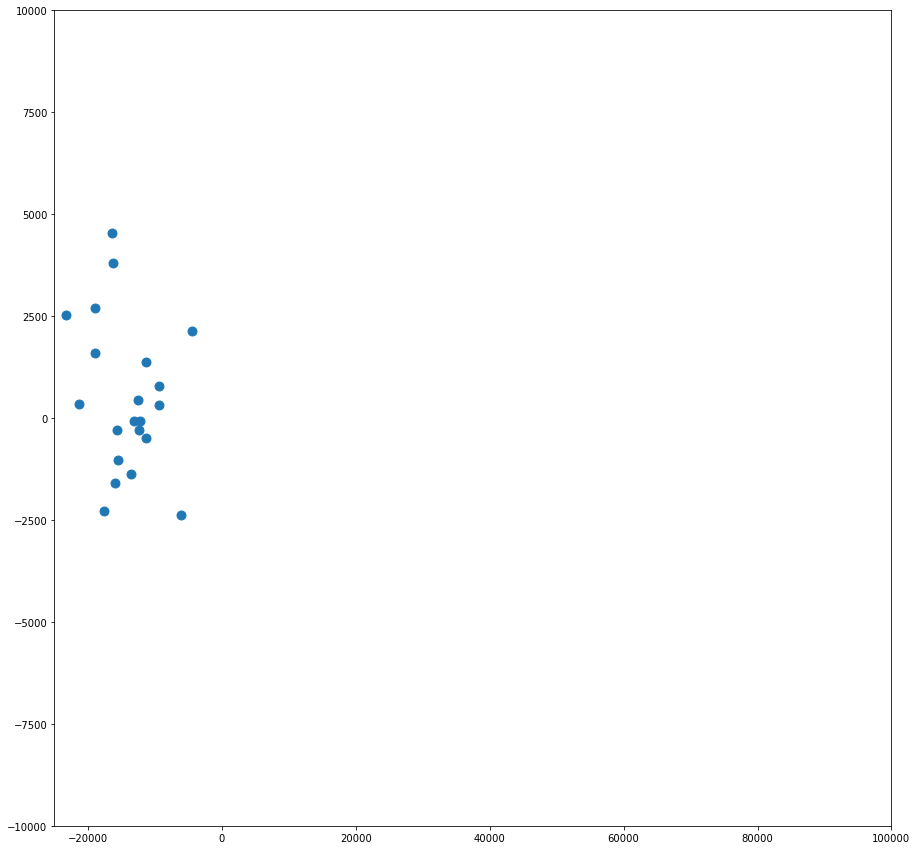

In [118]:
import matplotlib
plt.figure(figsize=(15,15))
plt.xlim((-25000, 100000))
plt.ylim((-10000, 10000))
plt.scatter(Fd[:, 0],Fd[:, 1], cmap='Oranges', label='1',s=80)
for i in range(Fd.shape[0]):
    plt.annotate(Fd[i], xy=(F[i]))
    xytext=(Fd[i, 0] + 0.001, Fd[i, 1] + 0.001)
plt.scatter(Sd[:, 0],Sd[:, 1], cmap='summer', label='2',s=80)
for i in range(Sd.shape[0]):
    plt.text(Sd[i, 0], Sd[i, 0],(S[i]))
plt.scatter(Td[:, 0],Td[:, 1], cmap='rainbow', label='3',s=80)
for i in range(Td.shape[0]):
    plt.text(Td[i, 0], Td[i, 0],(T[i]))
plt.legend(prop={"size": 20}) 
plt.grid(True)
plt.show()

In [ ]:
import matplotlib.pyplot as plt
import matplotlib
x1_min, x1_max=-200000, 200000 #第0维特征的范围
x2_min, x2_max=-200000, 200000 #第1维特征的范围
x1,x2=np.mgrid[x1_min:x1_max:1000j, x2_min:x2_max:1000j ] #生成网络采样点
grid_test=np.stack((x1.flat,x2.flat) ,axis=1) #测试点
#指定默认字体
matplotlib.rcParams['font.sans-serif']=['SimHei']
#设置颜色
cm_light=matplotlib.colors.ListedColormap(['#A0FFA0', '#FFA0A0', '#A0A0FF'])
#cm_dark=matplotlib.colors.ListedColormap(['#000000', '#FFA0A0', '#A0A0FF'] )
 
grid_hat = classifier.predict(grid_test)       # 预测分类值
grid_hat = grid_hat.reshape(x1.shape)  # 使之与输入的形状相同

In [ ]:
plt.pcolormesh(x1, x2, grid_hat, cmap=cm_light)     # 预测值的显示
plt.scatter(x.values[:, 0], x.values[:, 1], c=y[:,0], s=20,cmap=cm_dark)  # 样本
#plt.scatter(test_data.values[:,0],test_data.values[:,1], c=test_label[:,0],s=40,edgecolors='k', zorder=2,cmap=cm_dark) #圈中测试集样本点
plt.xlabel('特征1', fontsize=20)
plt.ylabel('特征2', fontsize=20)
plt.rcParams['figure.figsize'] = (30, 30)
plt.xlim(x1_min,x1_max)
plt.ylim(x2_min,x2_max)
plt.title('pca_svm', fontsize=20)
plt.show()